In [13]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries
from datetime import datetime
from pathlib import Path

In [14]:
SAVE_DIR = "/home/griffingoodwin/downloads"
os.makedirs(SAVE_DIR, exist_ok=True)
def download_and_save_goes_data(start='2023-07-01', end='2023-08-15'):
    print(f"Searching GOES X-ray data from {start} to {end}...")
    goes_query = Fido.search(a.Time(start, end), a.Instrument('XRS'))
    print(f"Found {len(goes_query[0])} GOES files.")

    print("Downloading...")
    downloaded_files = Fido.fetch(goes_query, path=SAVE_DIR + "/{file}")
    missed_files = [file for file in goes_query[0]['url'] if file not in downloaded_files]
    print(f"Saved {len(downloaded_files)} files to {SAVE_DIR}")
    print(f"Missed {len(missed_files)} files.")

    # Save file paths to a text file
    file_list_path = os.path.join(SAVE_DIR, "downloaded_files.txt")
    with open(file_list_path, "w") as file_list:
        file_list.write("\n".join(downloaded_files))
    print(f"File paths saved to {file_list_path}")

    # Save missed file paths to a separate text file
    missed_file_list_path = os.path.join(SAVE_DIR, "missed_files.txt")
    with open(missed_file_list_path, "w") as missed_file_list:
        missed_file_list.write("\n".join(missed_files))
    print(f"Missed file paths saved to {missed_file_list_path}")

    return downloaded_files, missed_files

def plot_goes_data(downloaded_files):
    print("Plotting GOES X-ray data...")
    for file in downloaded_files:
        try:
            ts = TimeSeries(file)
            fig, ax = plt.subplots(figsize=(10, 6))
            ts.plot(ax)
            ax.set_title(f"GOES X-ray Data: {file}")
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
            ax.set_xlabel("Time")
            ax.set_ylabel("Flux")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Failed to plot {file}: {e}")


Searching GOES X-ray data from 2023-07-01 to 2023-08-15...
Found 46 GOES files.
Downloading...


Files Downloaded:   0%|          | 0/46 [00:00<?, ?file/s]

Saved 46 files to /home/griffingoodwin/downloads
Missed 46 files.
File paths saved to /home/griffingoodwin/downloads/downloaded_files.txt
Missed file paths saved to /home/griffingoodwin/downloads/missed_files.txt
Plotting GOES X-ray data...


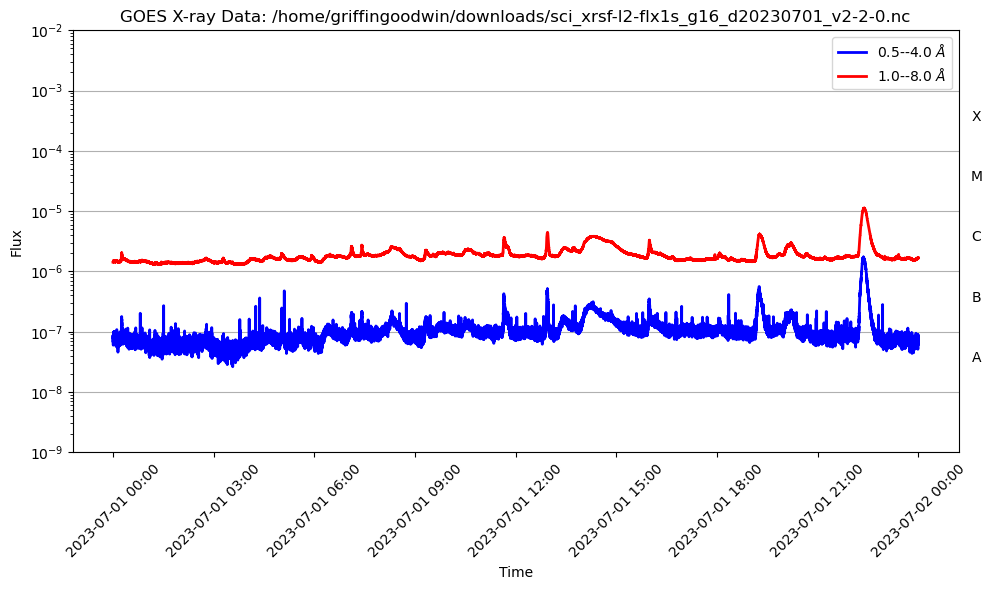

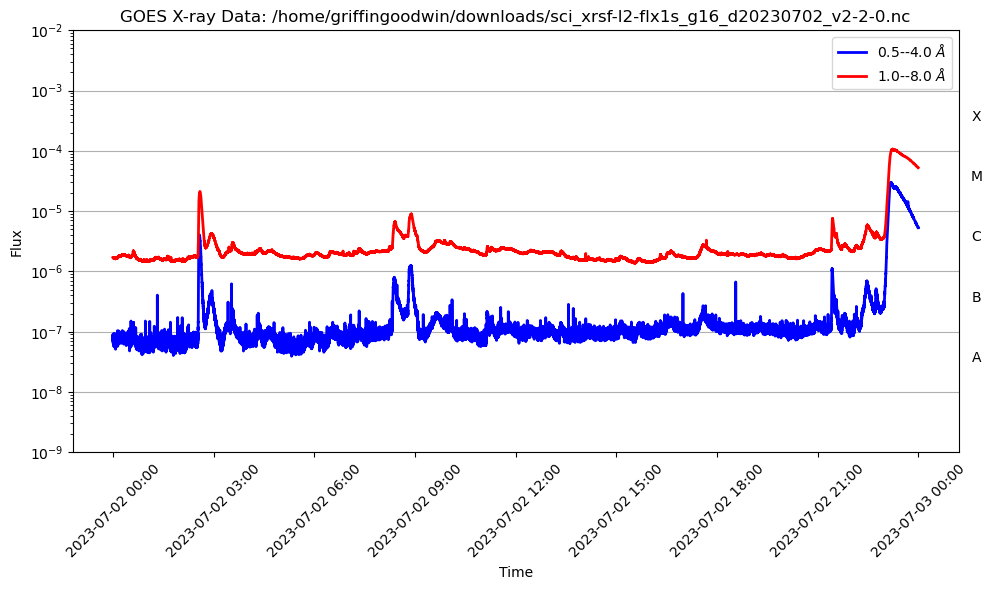

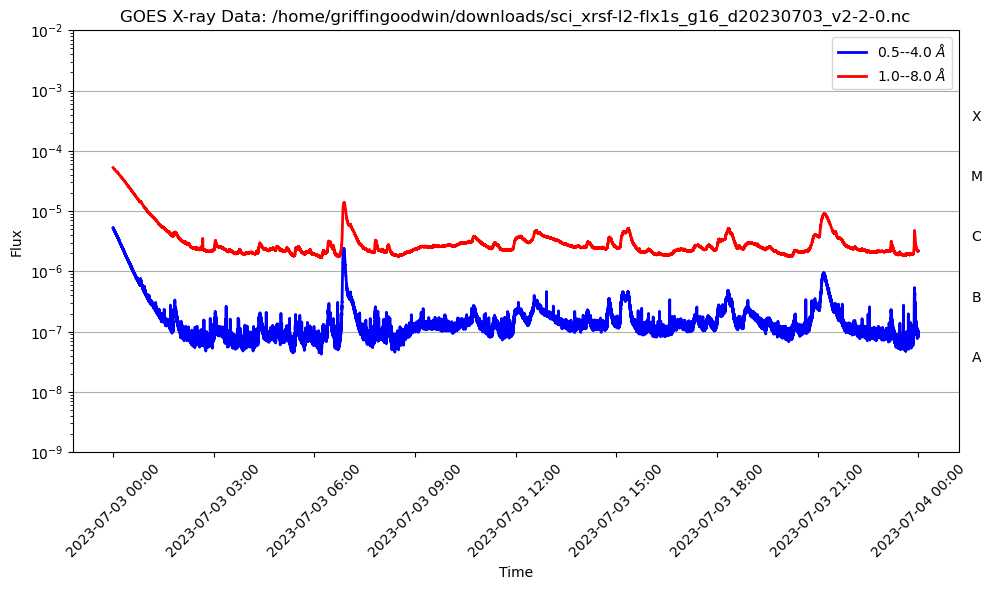

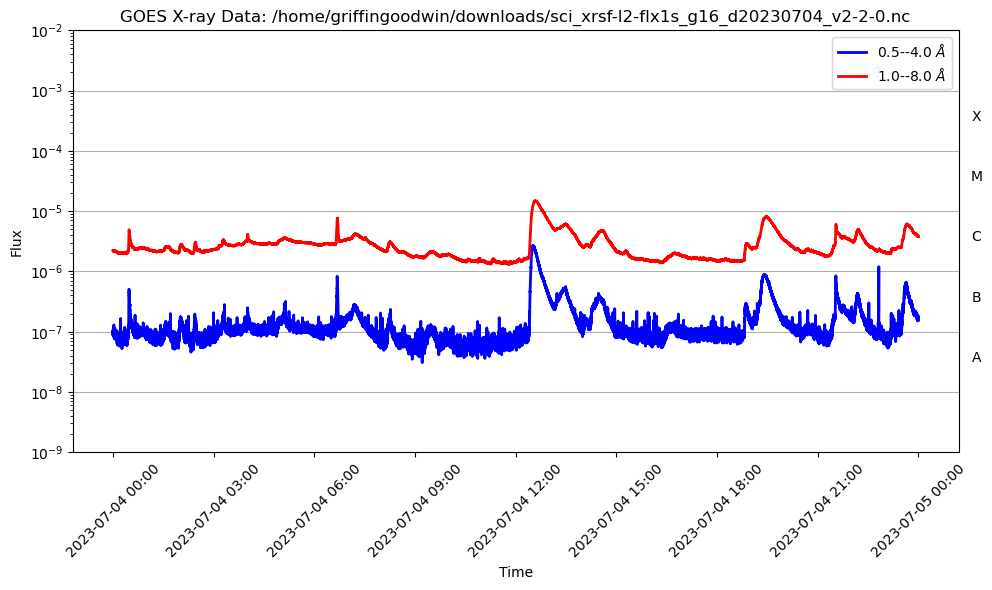

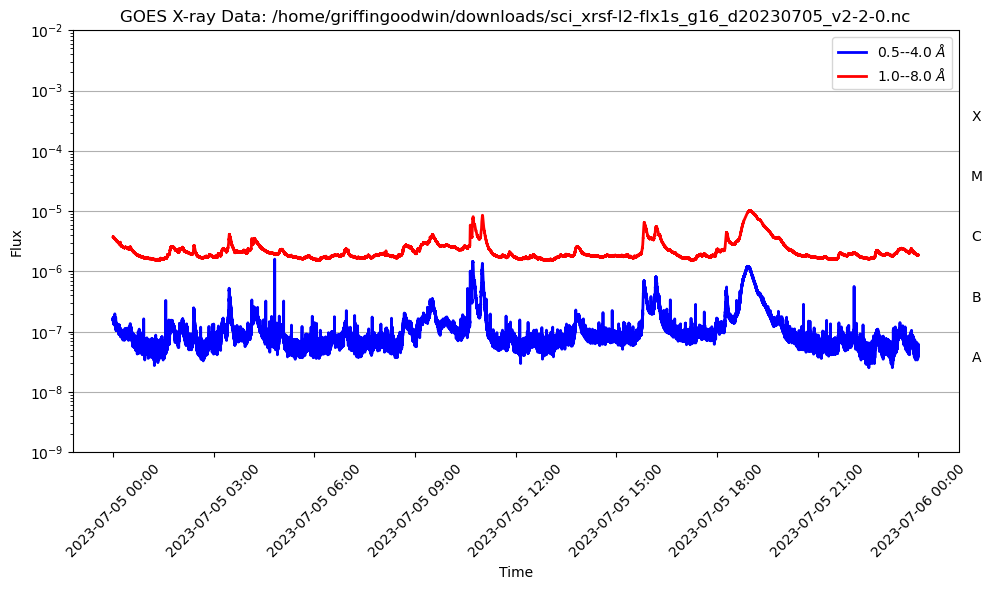

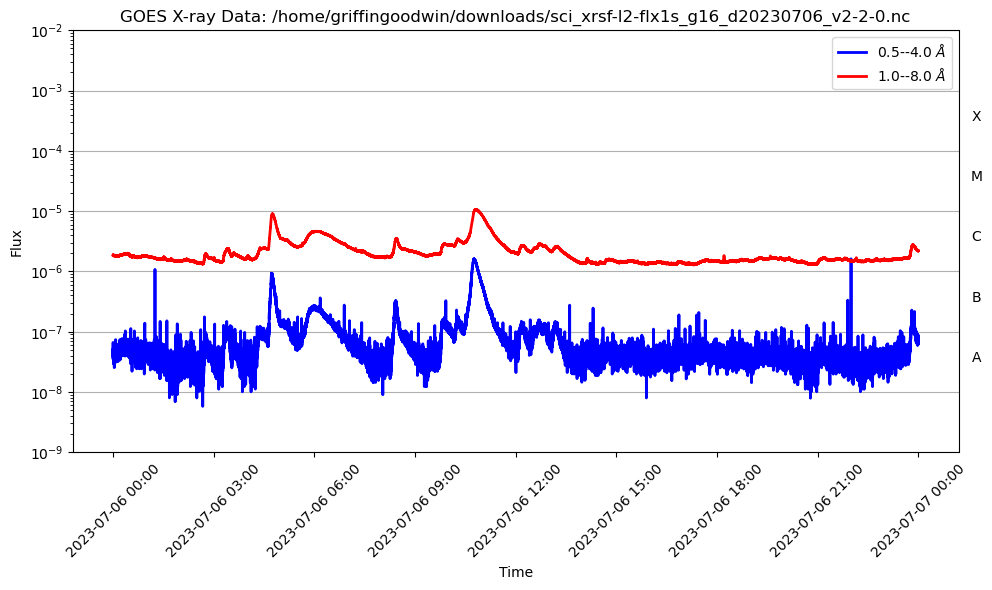

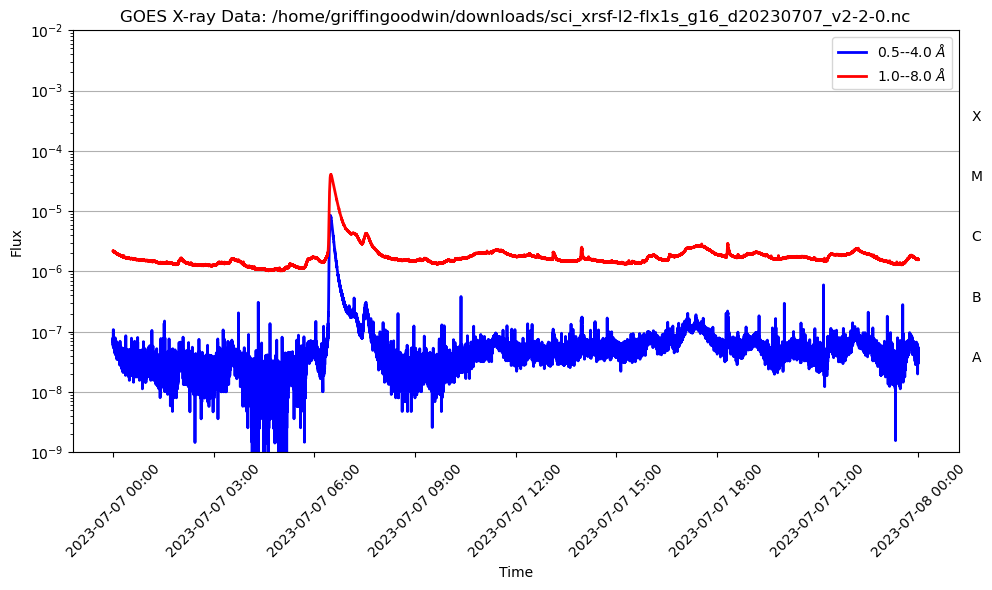

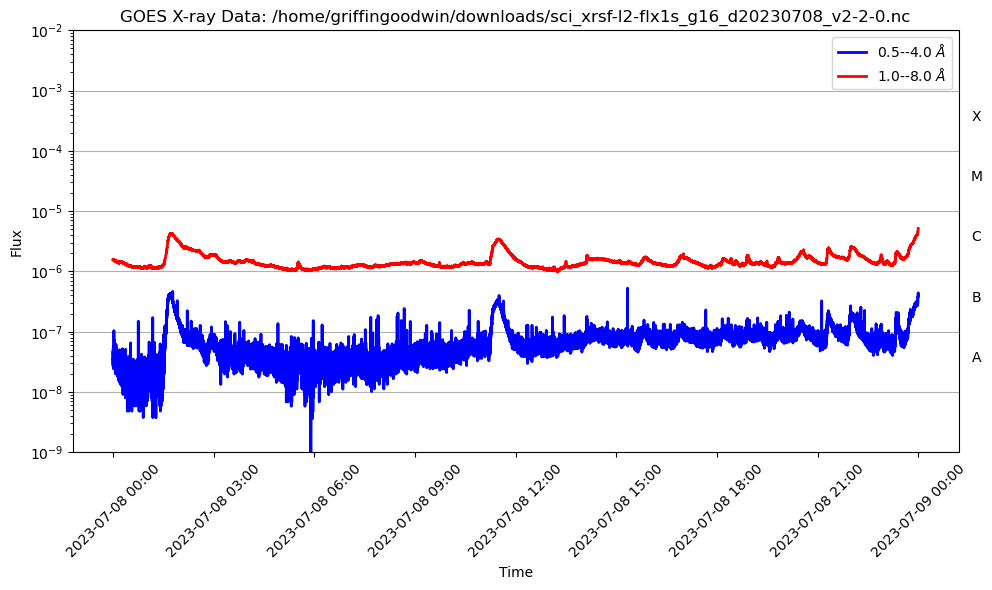

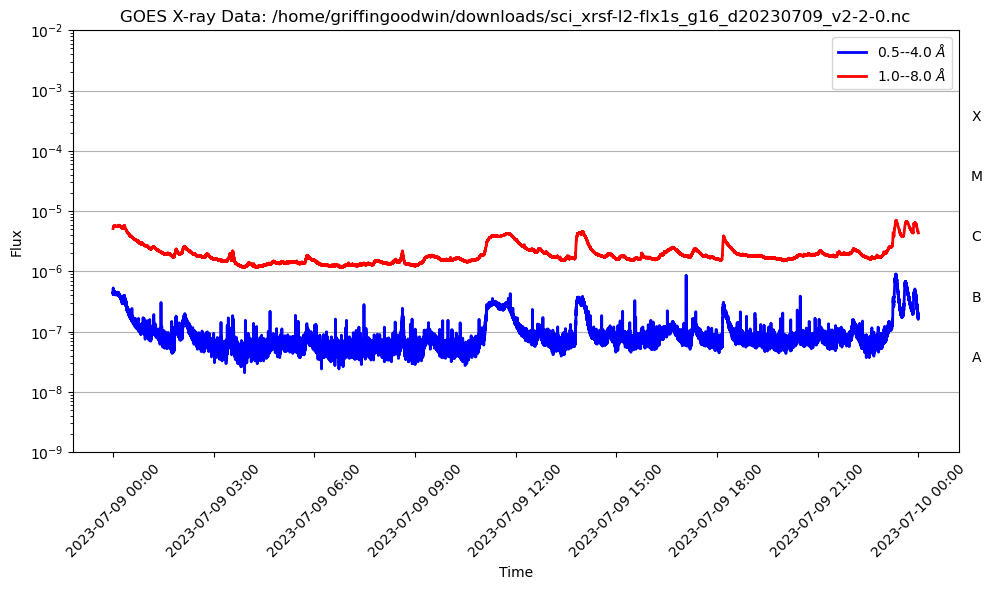

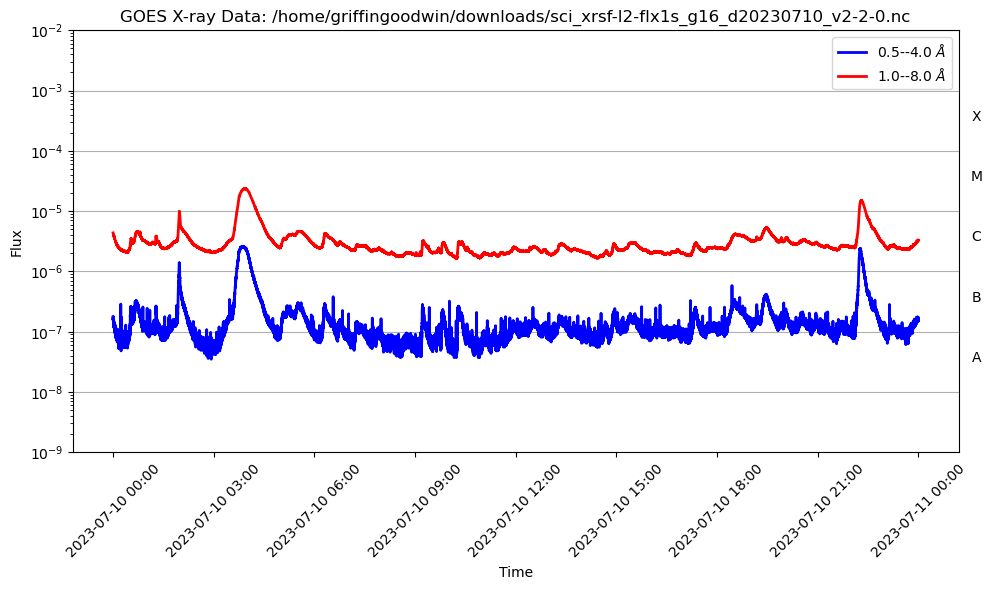

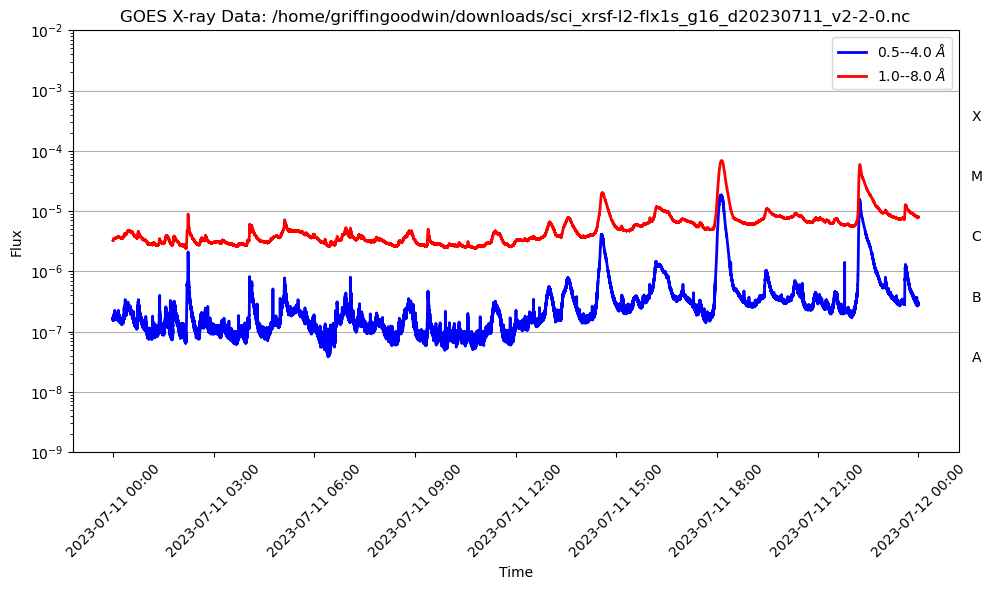

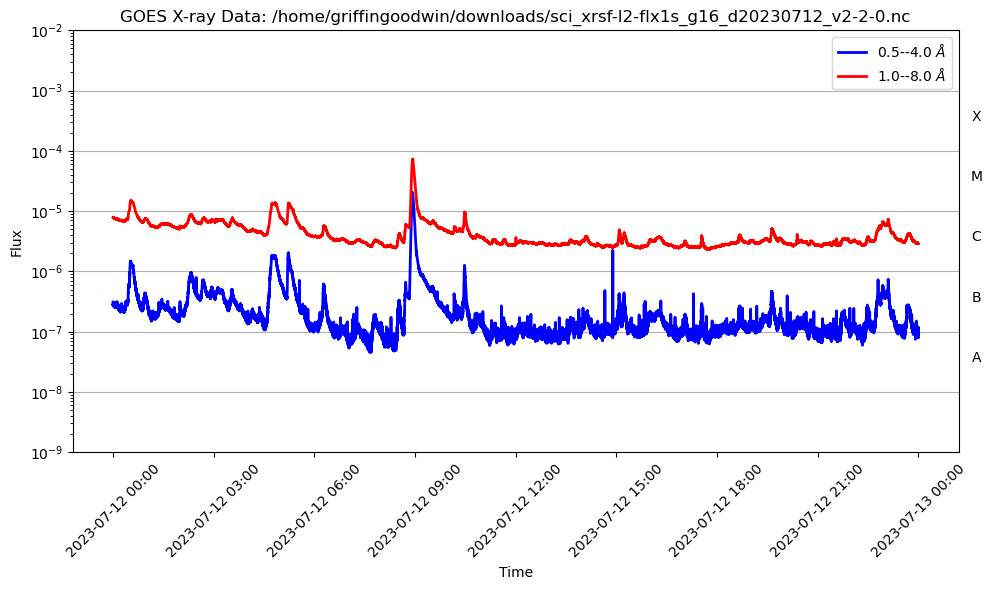

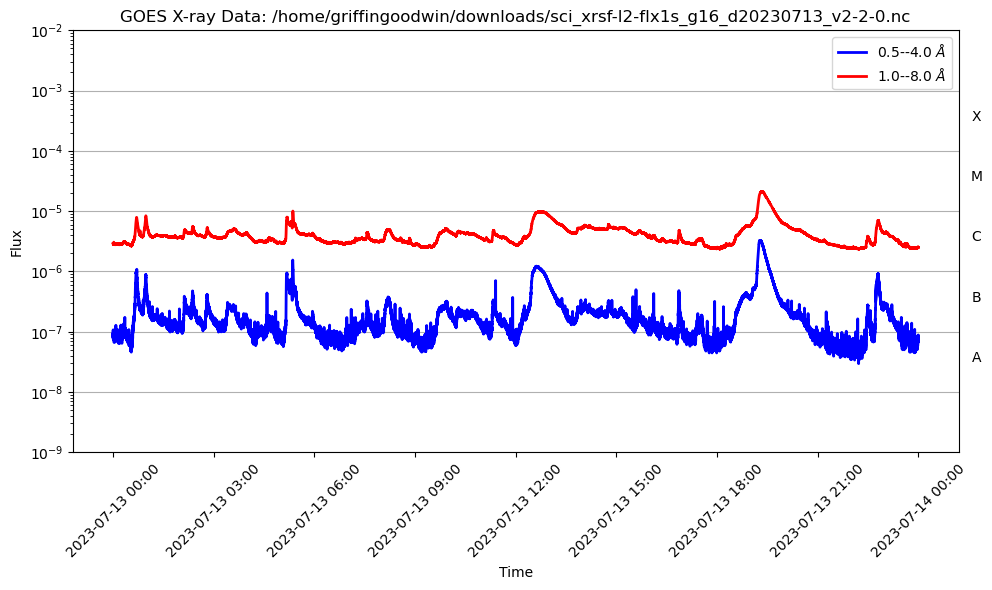

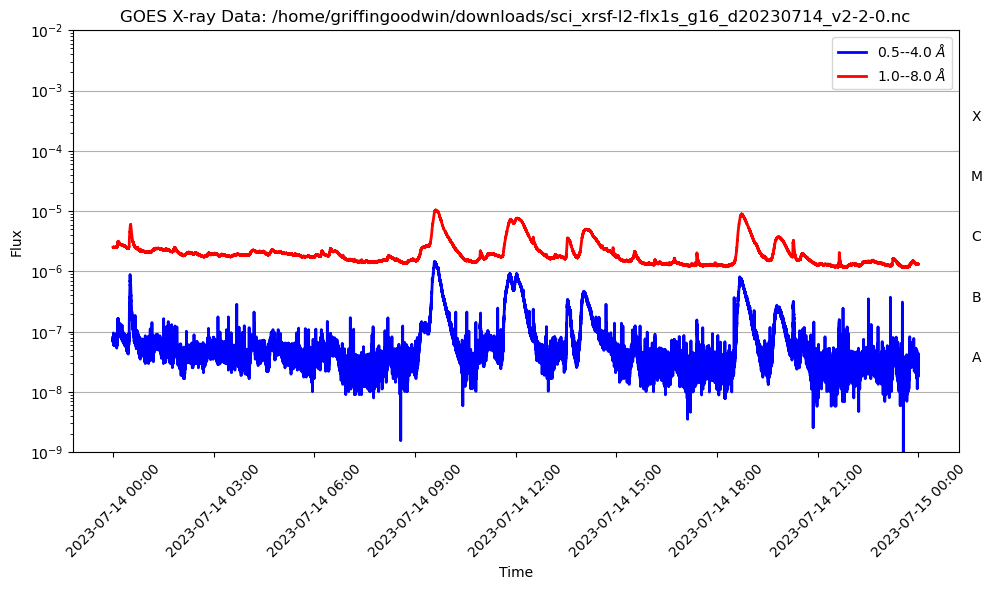

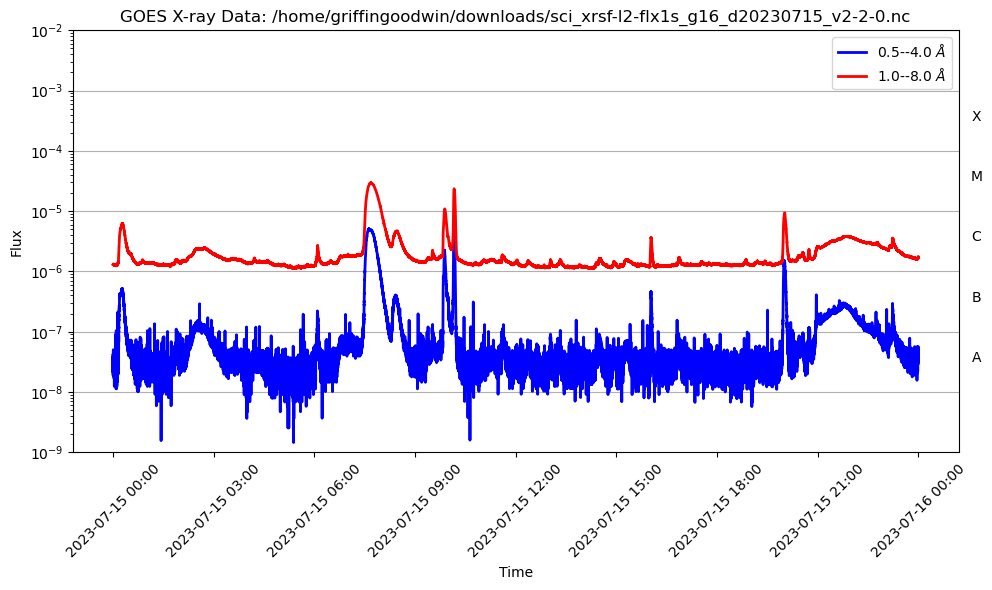

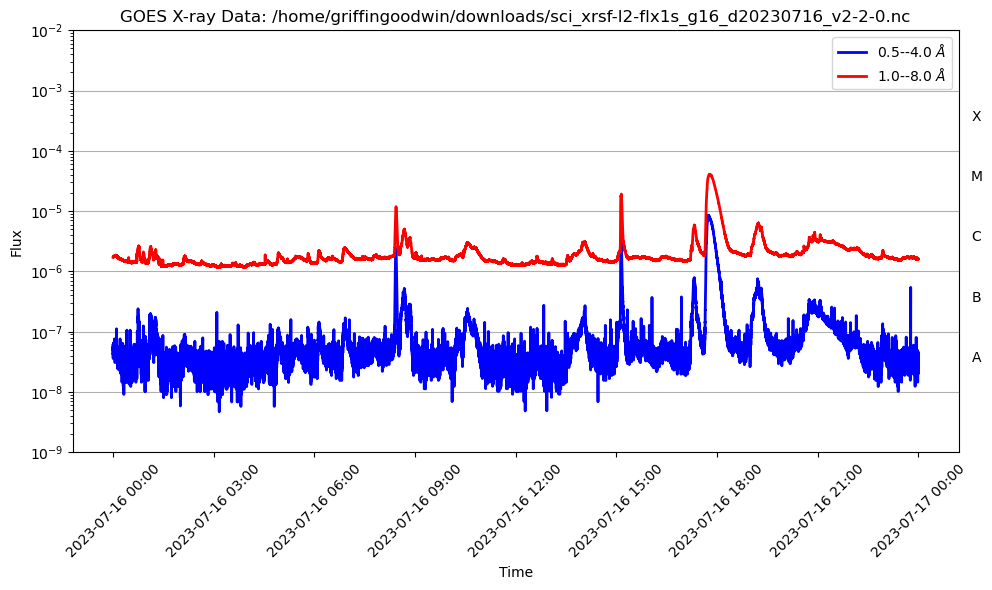

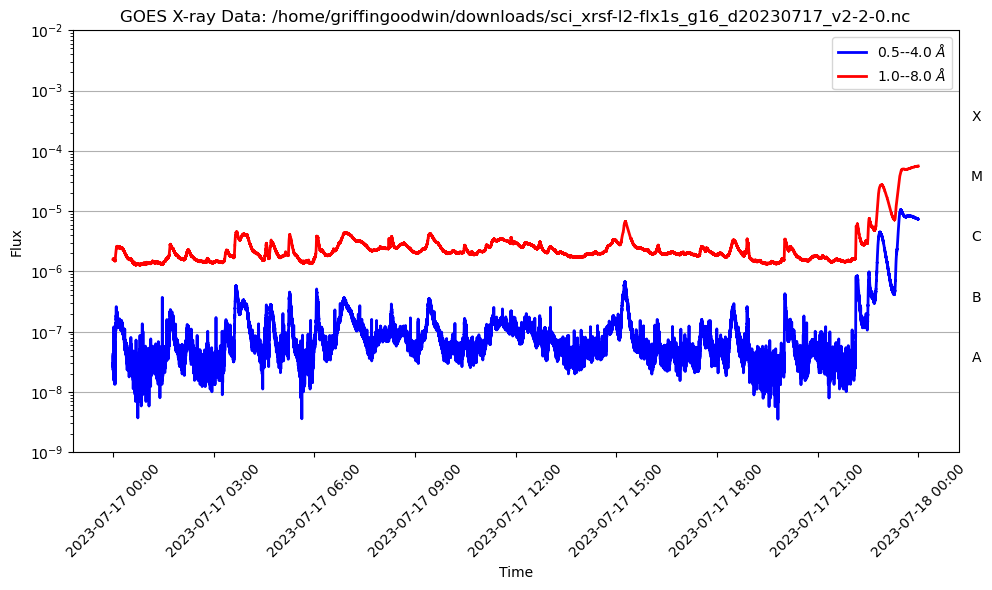

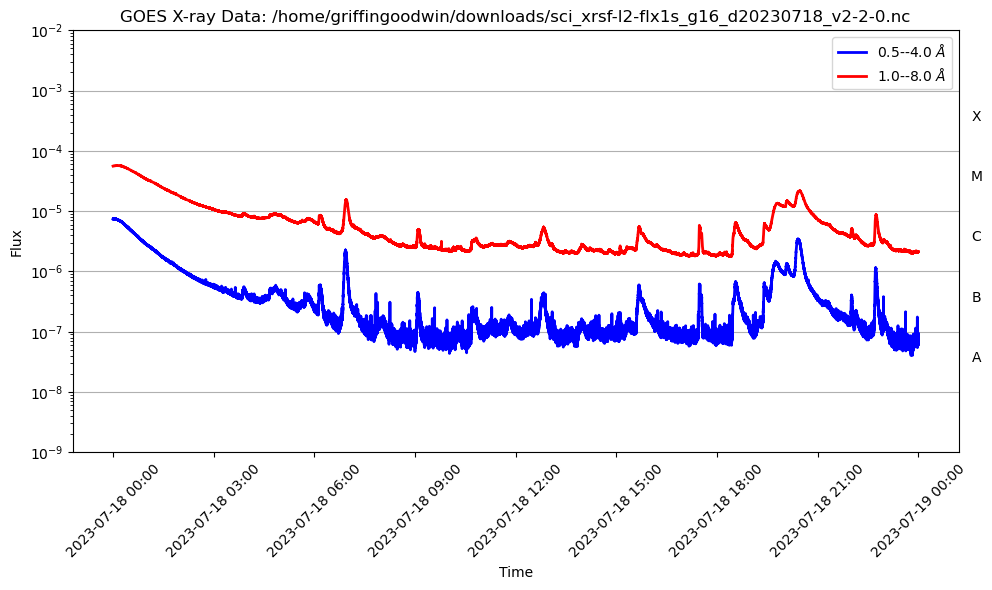

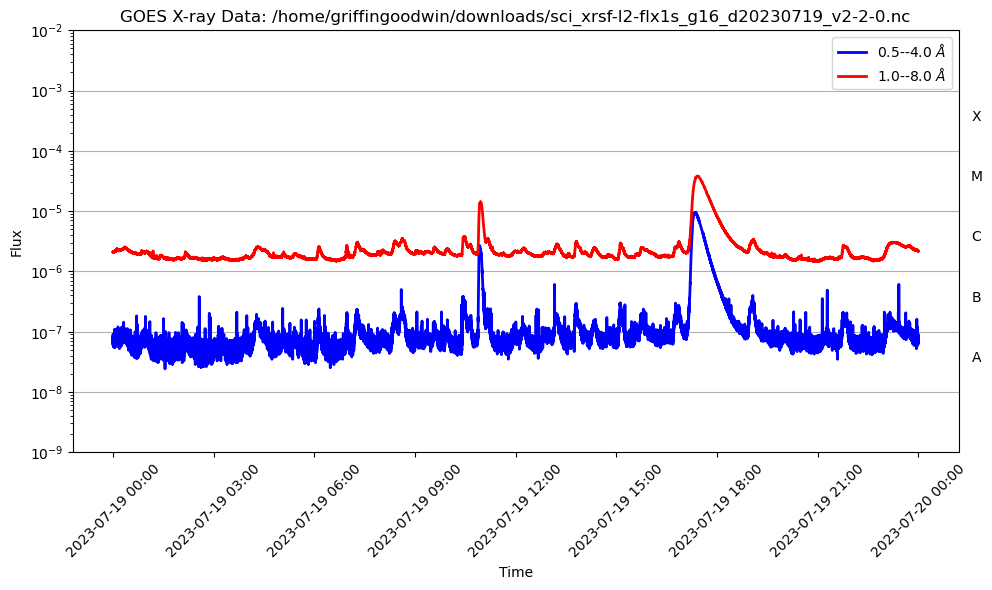

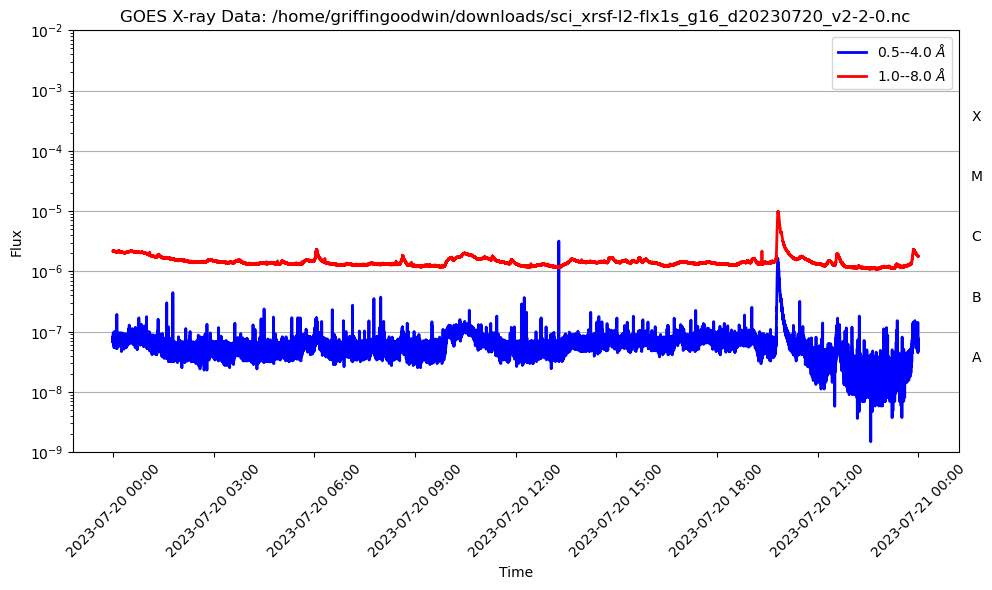

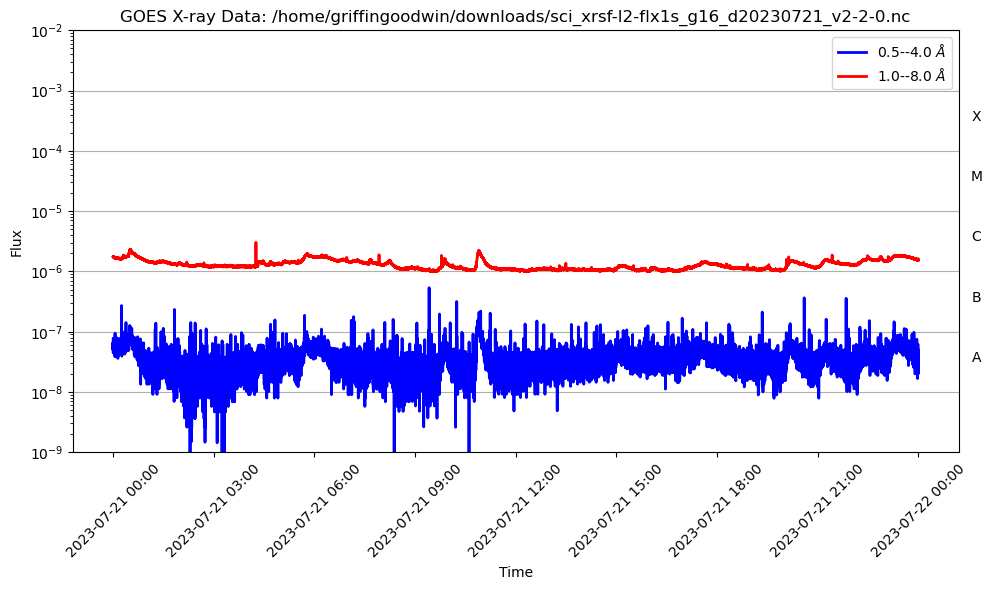

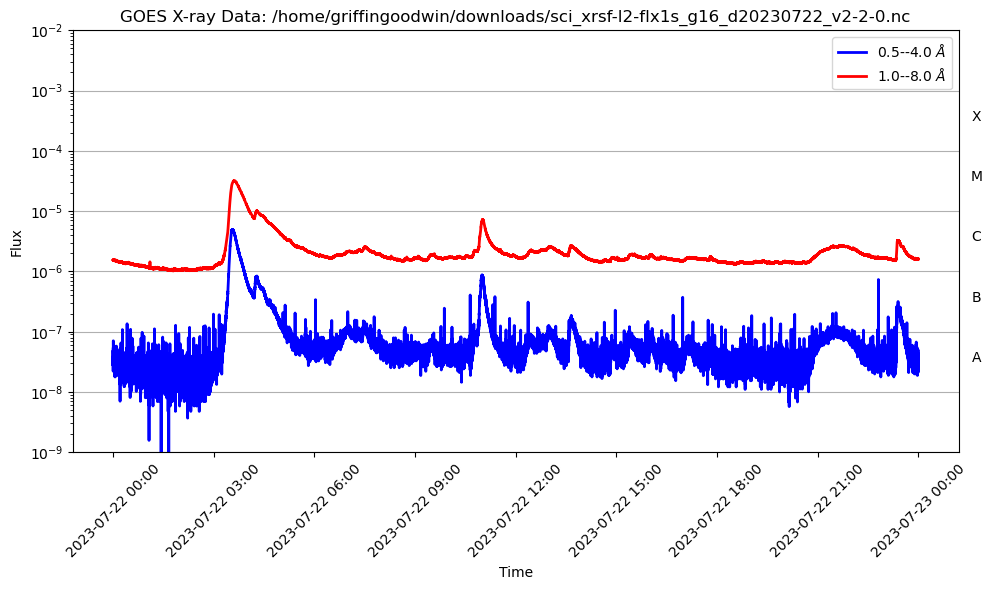

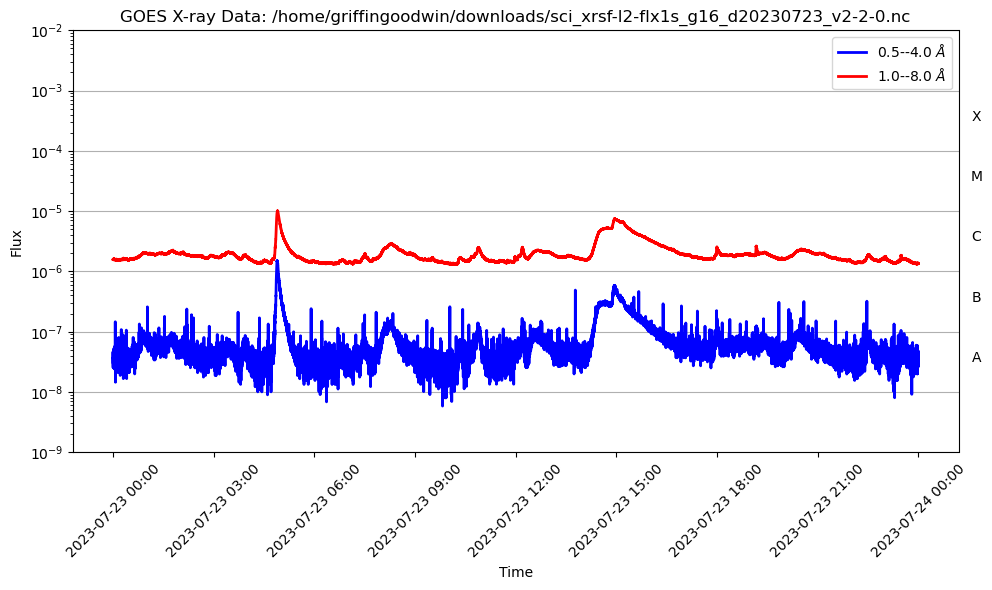

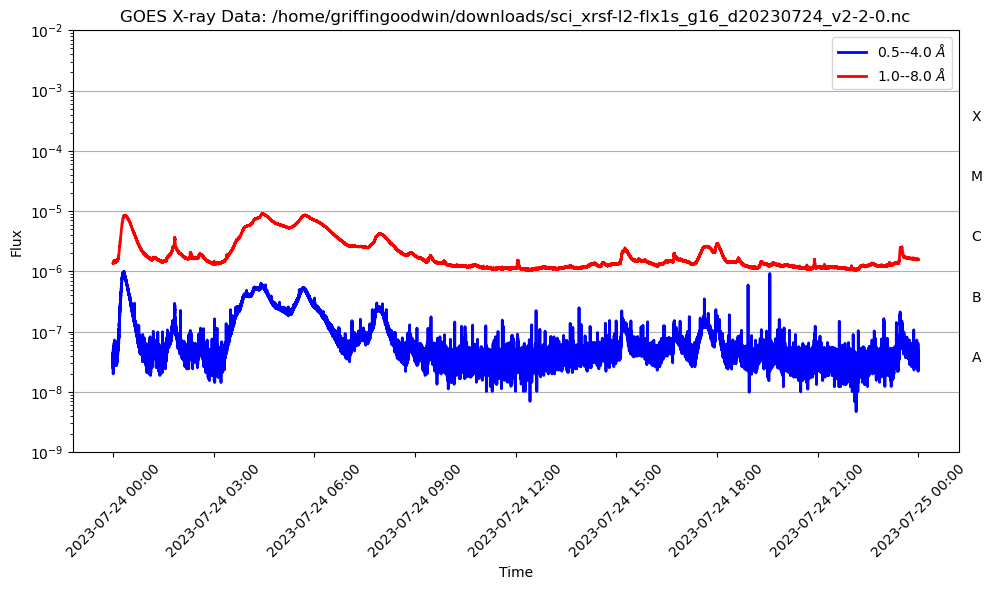

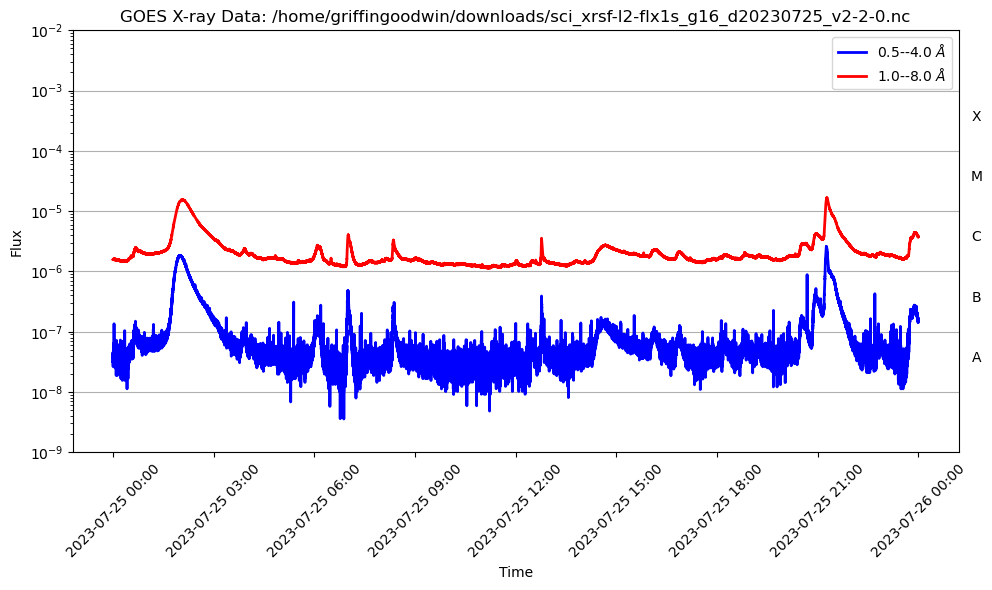

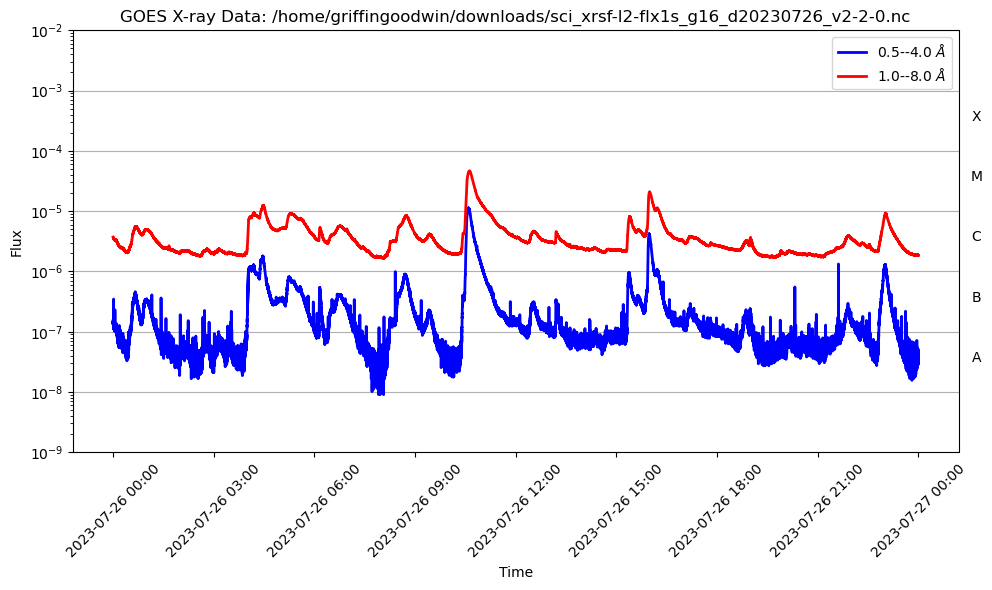

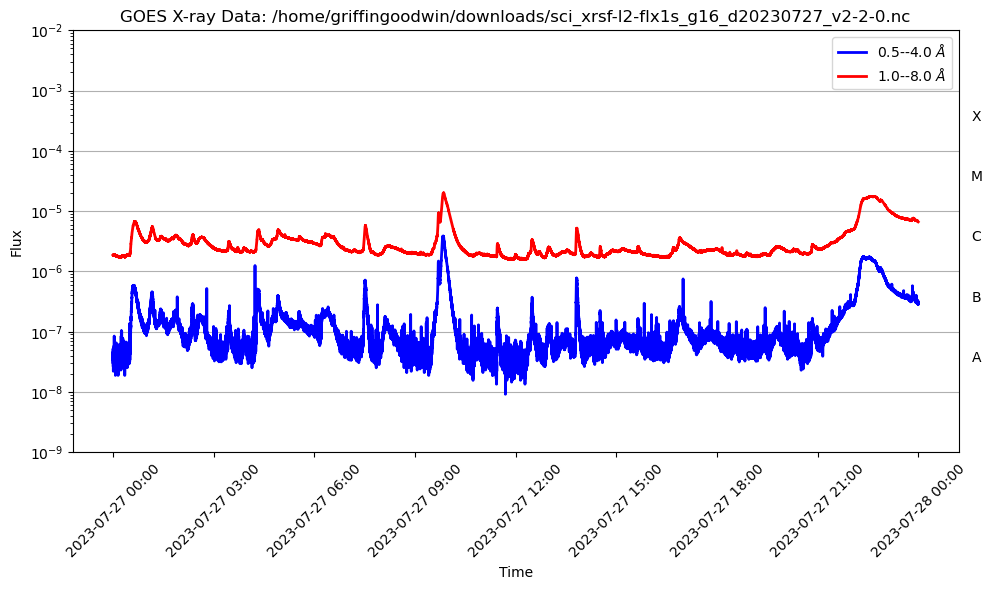

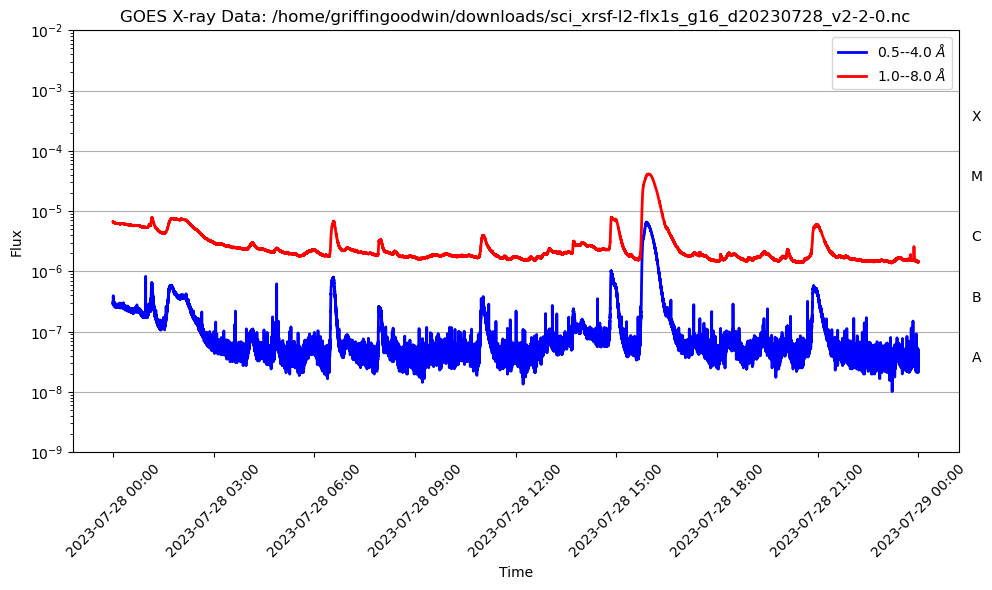

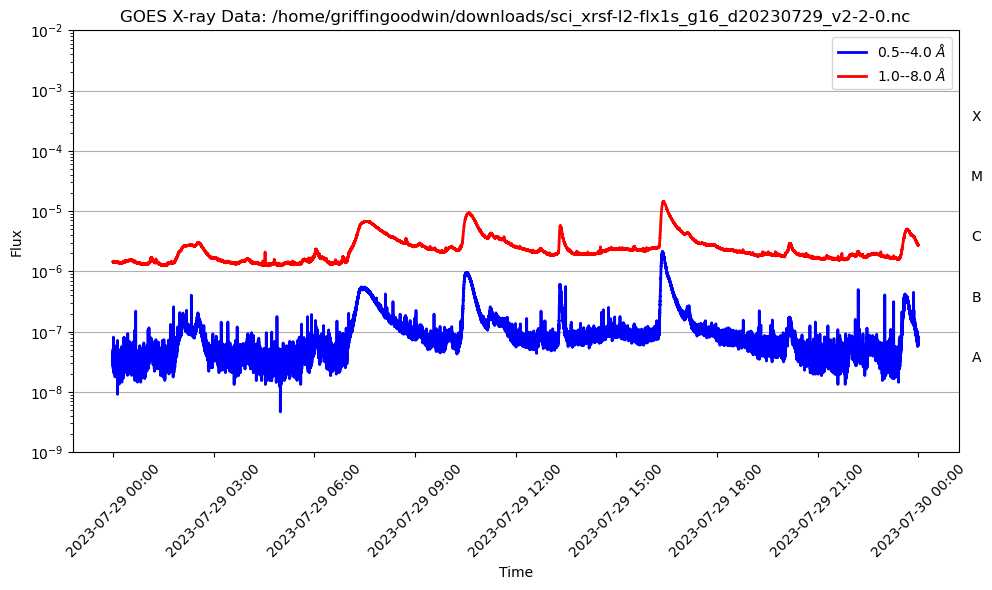

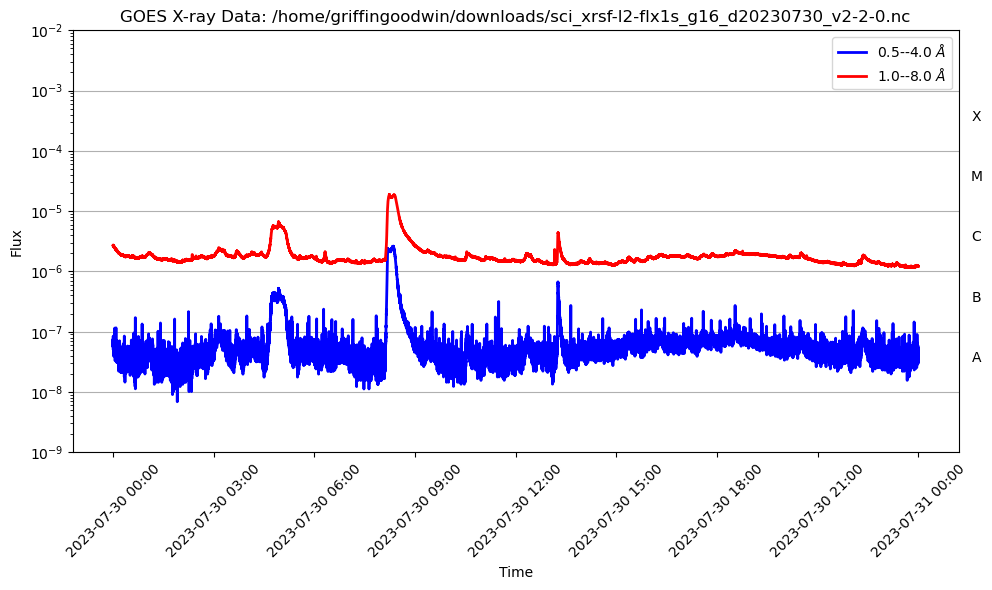

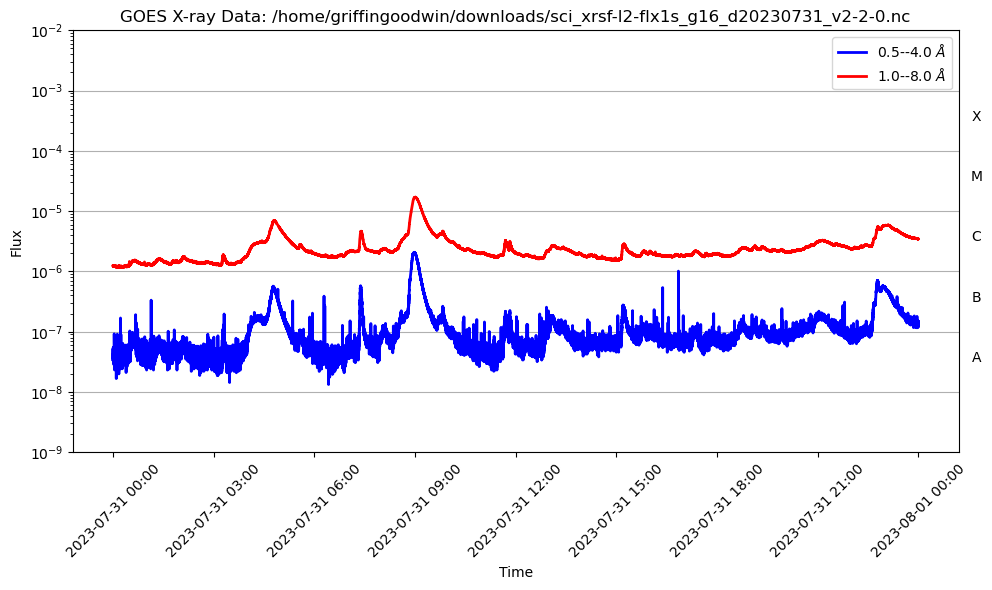

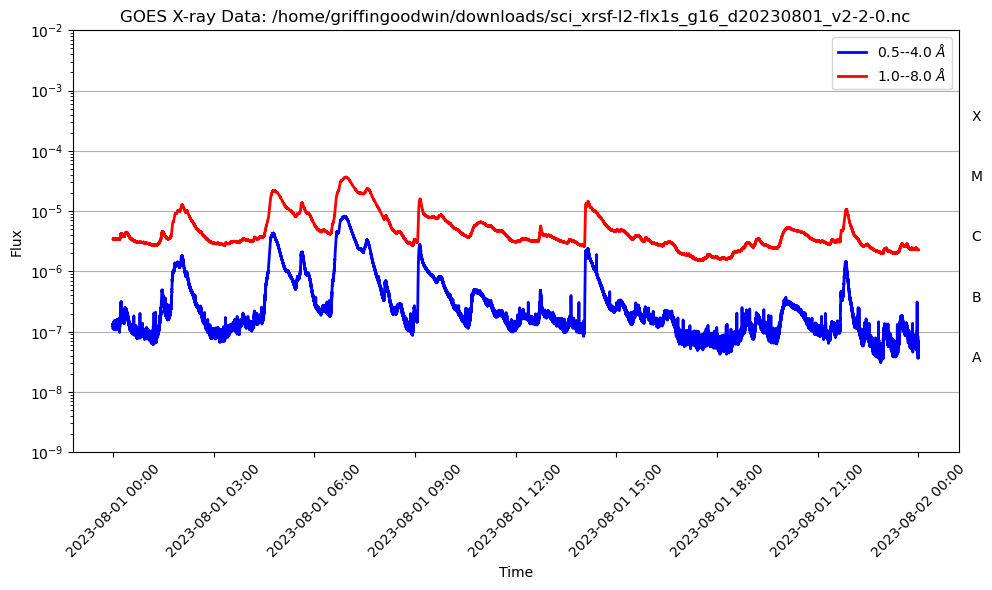

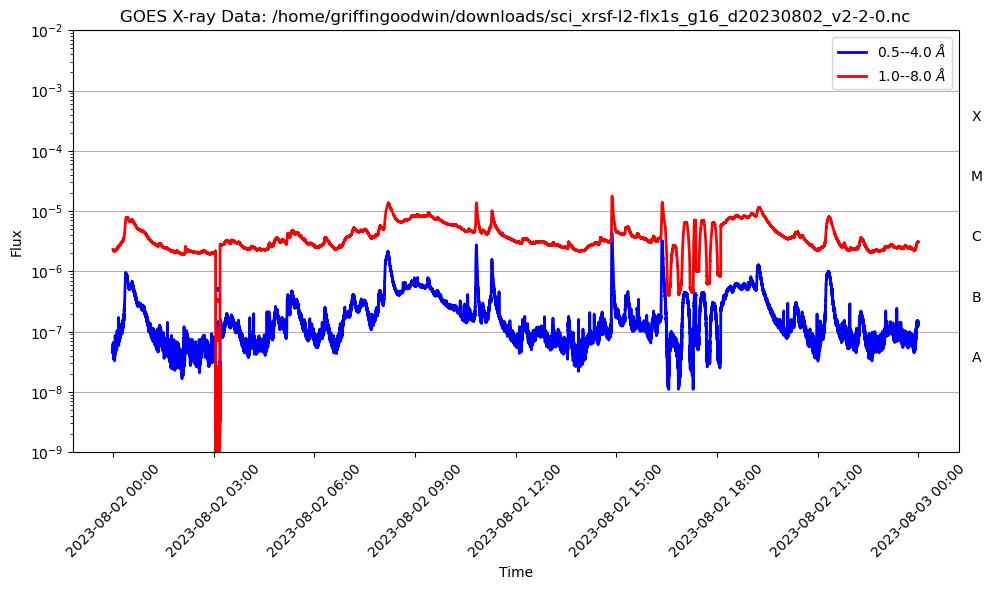

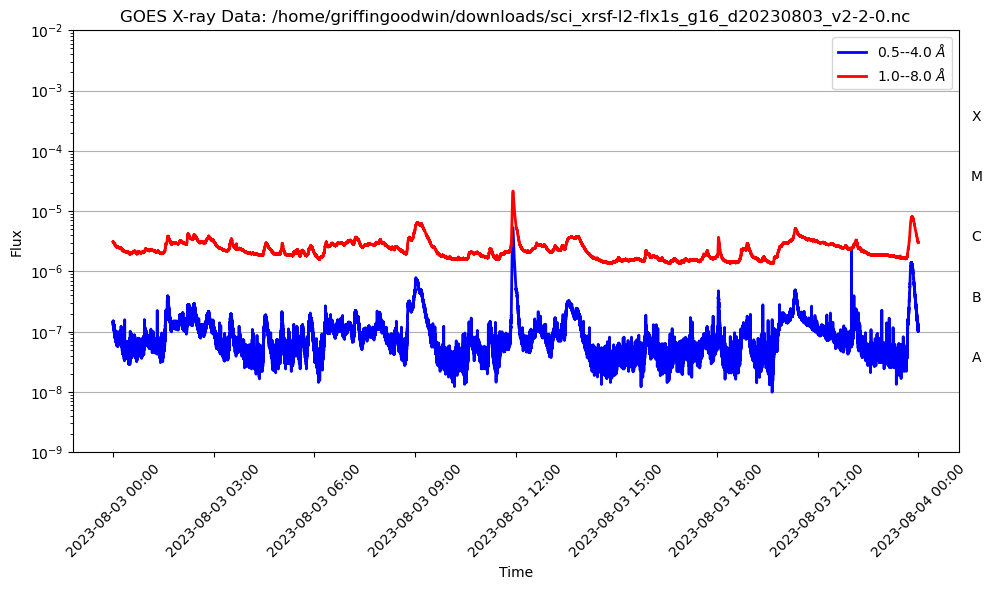

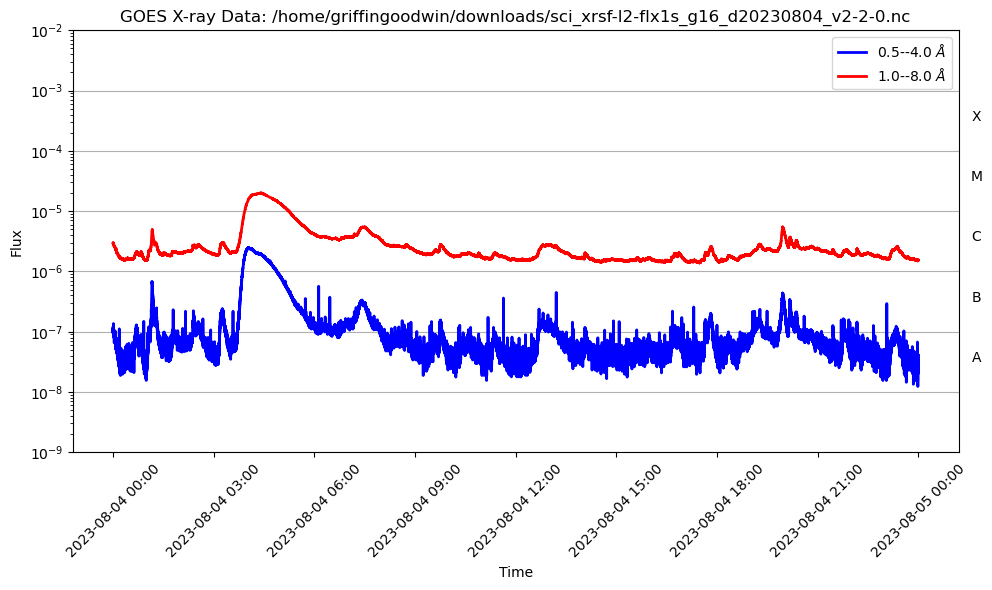

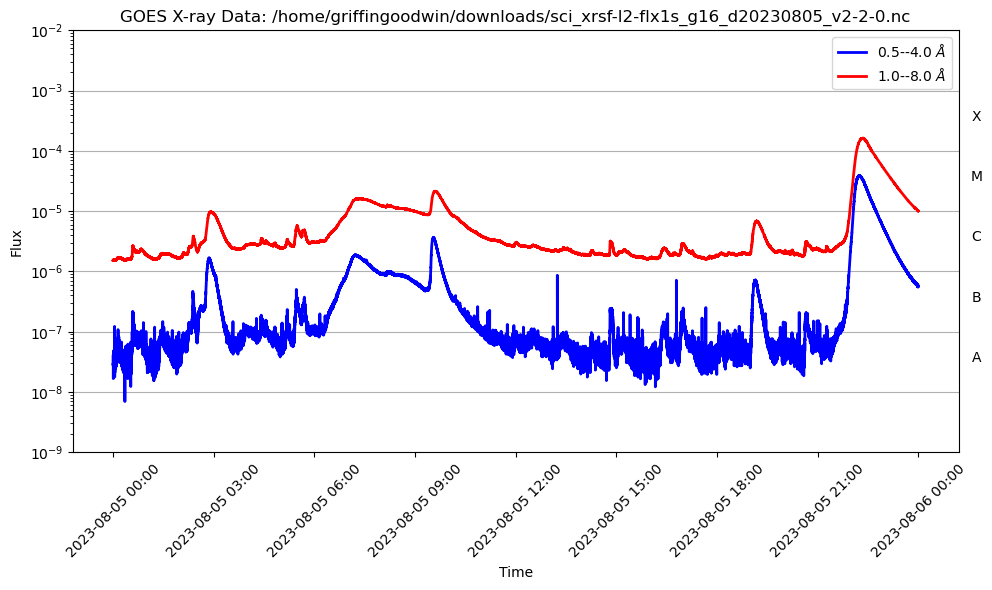

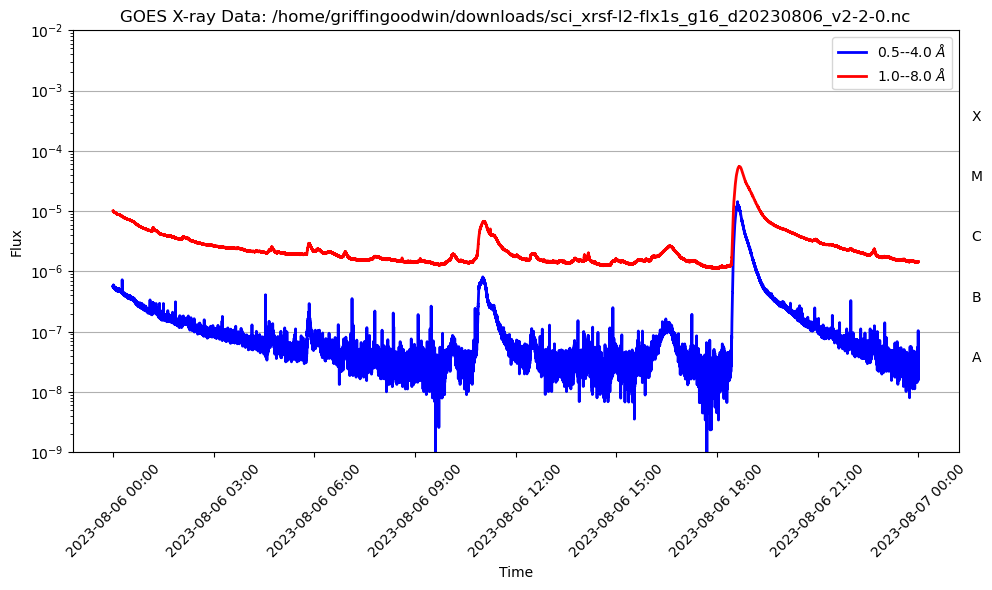

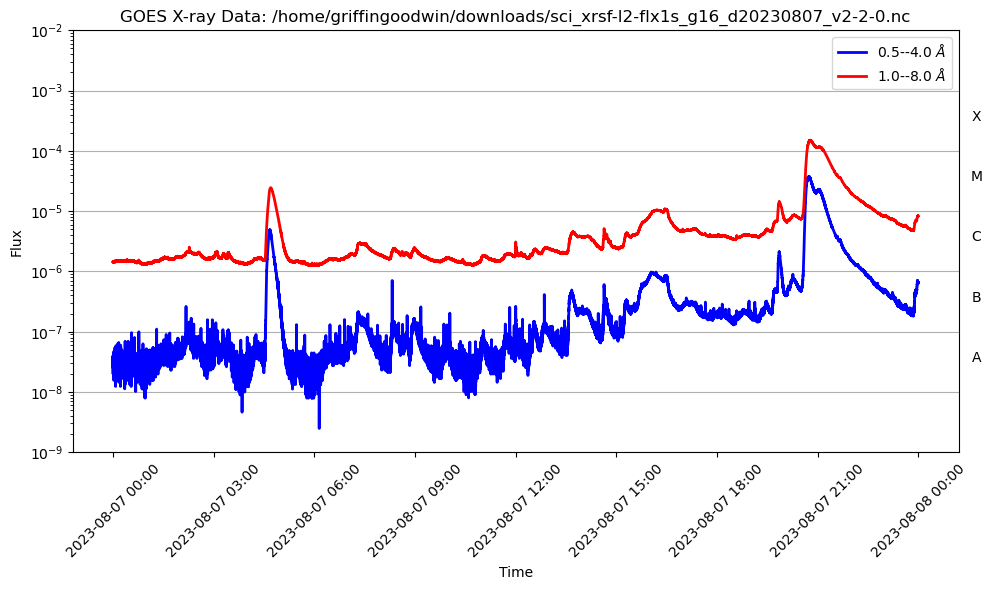

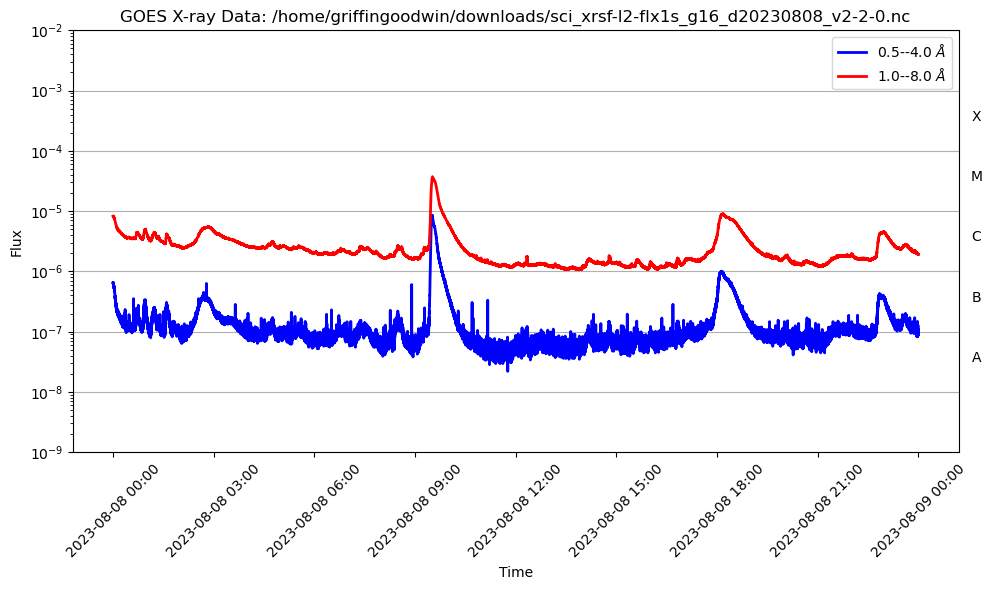

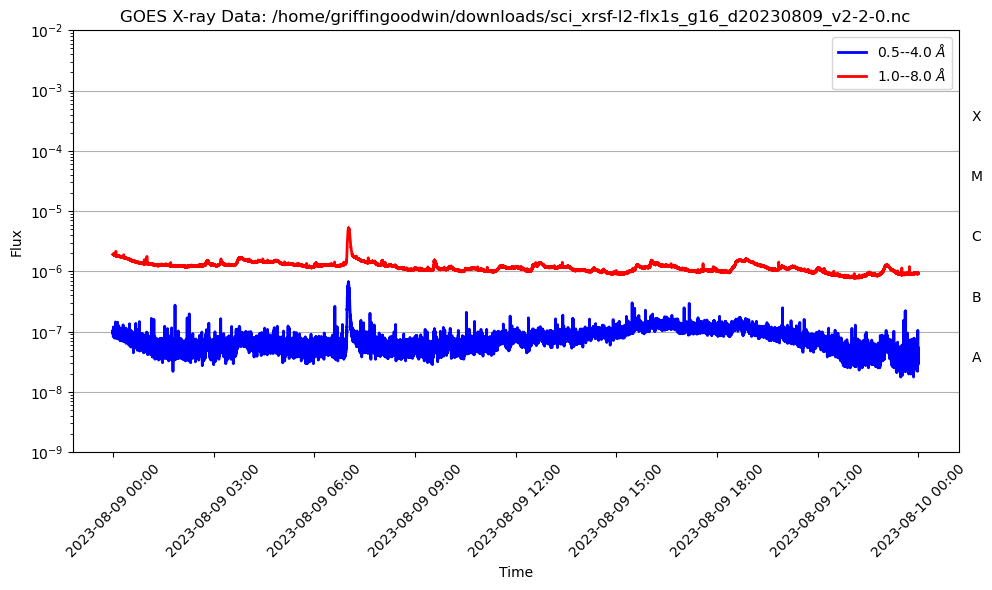

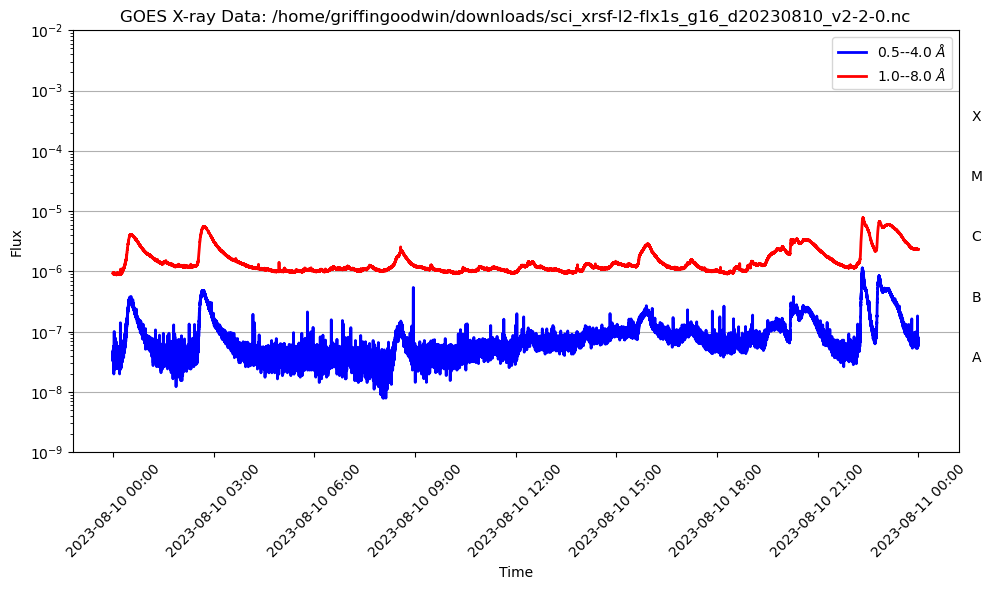

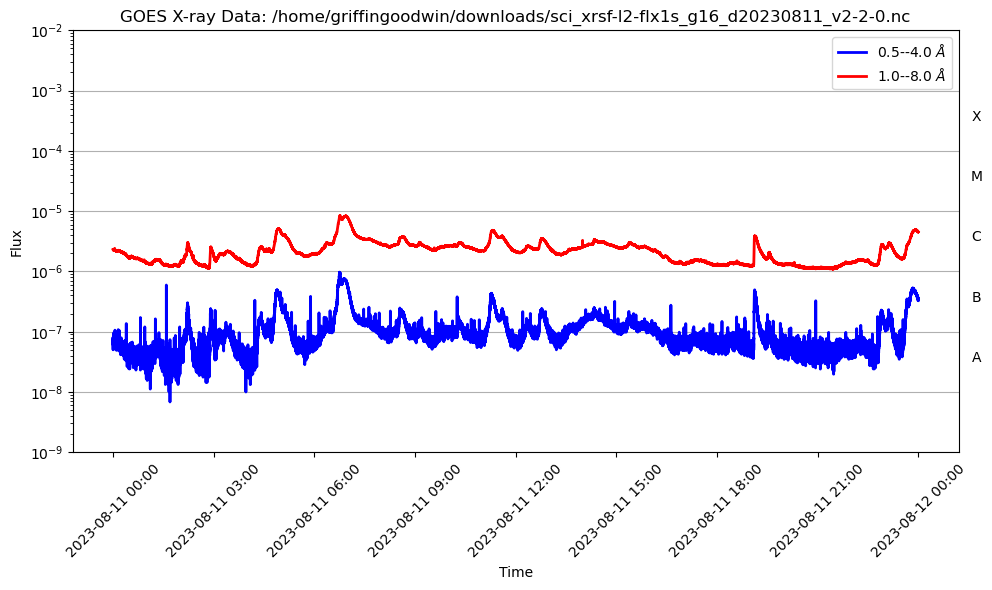

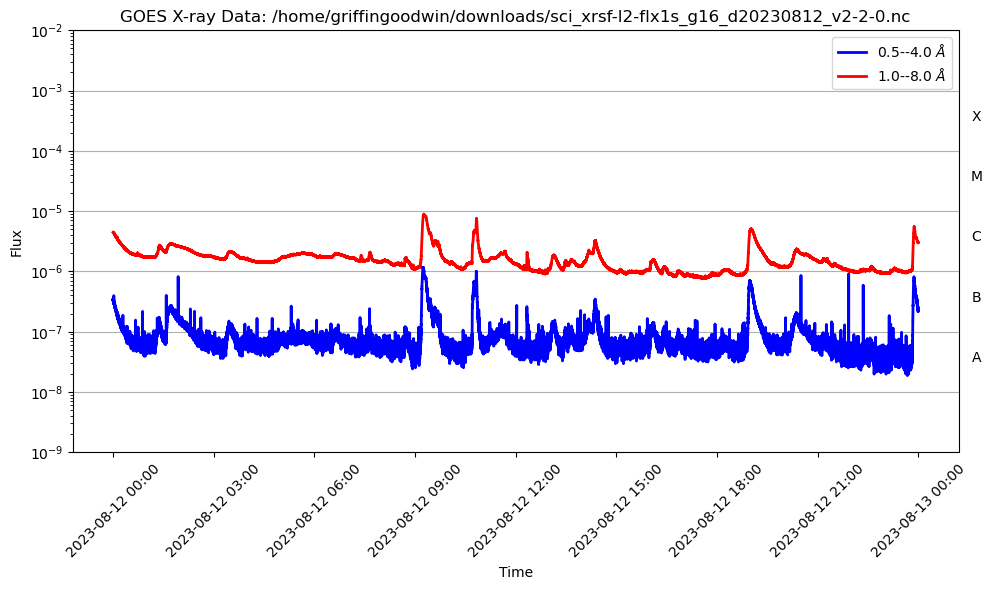

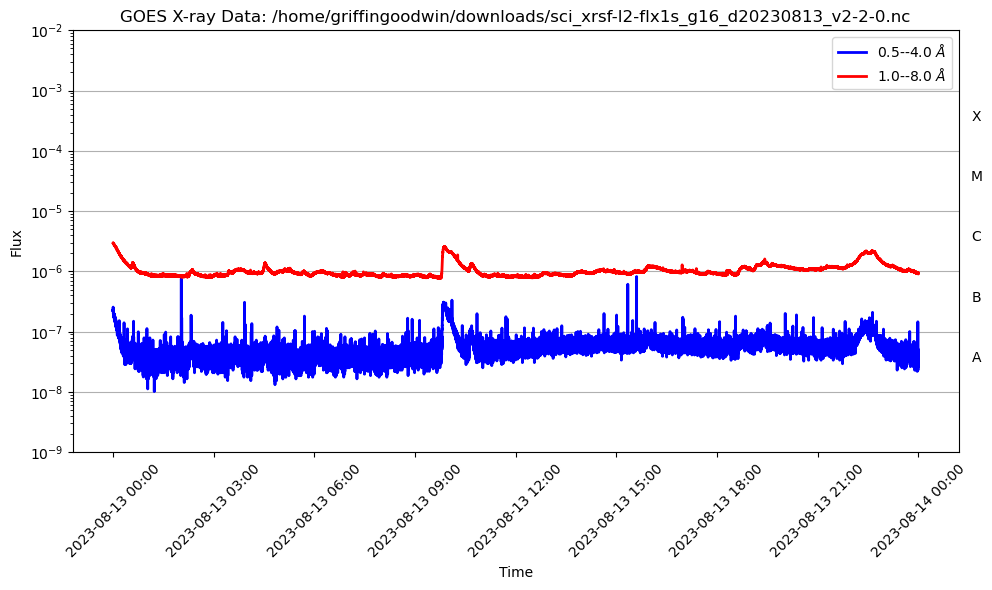

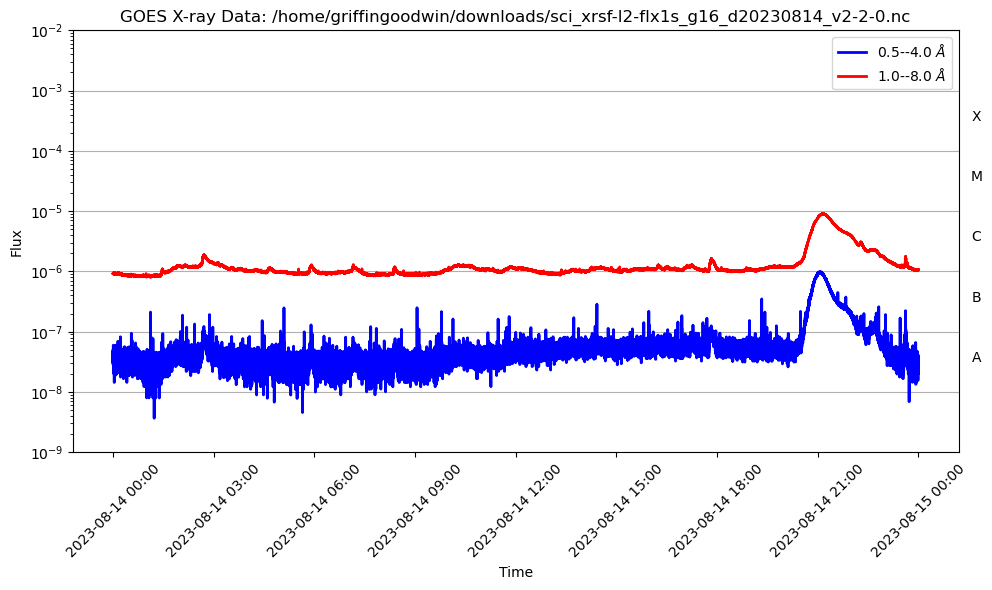

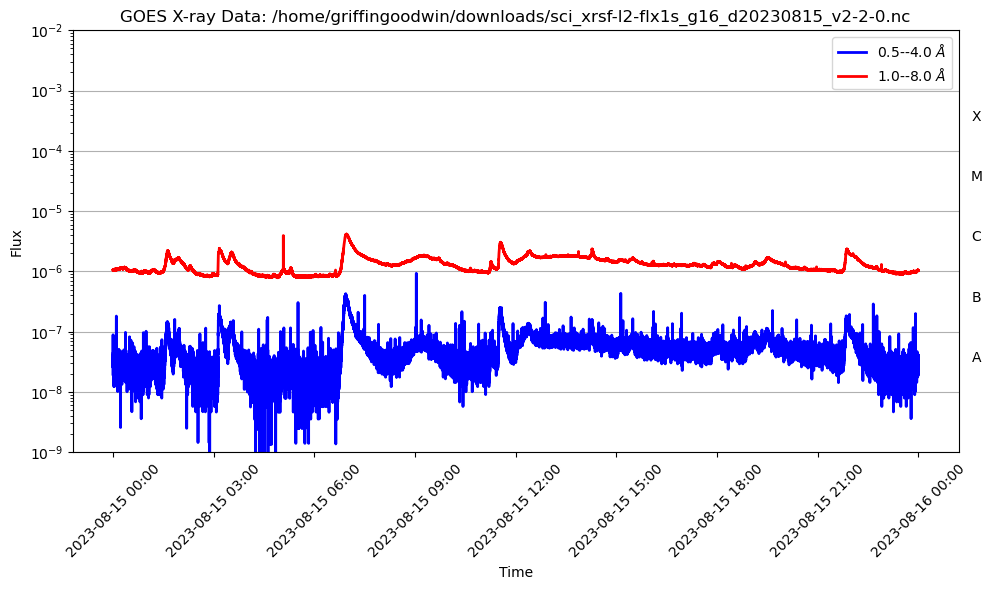

In [17]:
downloaded_files, missed_files = download_and_save_goes_data()
plot_goes_data(downloaded_files)

In [15]:
def plot_goes_data(downloaded_files):
    print("Plotting GOES X-ray data...")
    for file in downloaded_files:
        try:
            ts = TimeSeries(file)
            fig, ax = plt.subplots(figsize=(10, 6))
            ts.plot(ax)
            ax.set_title(f"GOES X-ray Data: {file}")
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
            ax.set_xlabel("Time")
            ax.set_ylabel("Flux")
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
        except Exception as e:
            print(f"Failed to plot {file}: {e}")


In [16]:
plot_goes_data(downloaded_files)

NameError: name 'downloaded_files' is not defined